### Goal: 
##### To build a text classification model to predict the artist from a piece of text

In [1]:
#To make this scrapper look legitimate, we spoof the headers we send along with our requests

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

1. Download HTML pages --> 2. Get a list of song urls --> 3. Extract lyrics from song urls

In [2]:
BASE_URL = "https://www.lyrics.com"

def get_lyrics(path):
    new_url = BASE_URL + path
    r = requests.get(new_url)
    soup = BeautifulSoup(r.content , 'html.parser').text
    return soup.find('h1'), soup.find('pre')

In [3]:
url = BASE_URL + "/artist/Lokua-Kanza/173548"

r = requests.get(url)
soup = BeautifulSoup(r.content , 'html.parser')
tags = soup.find_all('strong')

song_links = []
# iterate over each song entry and grab the link to the lyrics
for content in tags:
    link = content.find('a')
    if link and link['href'].startswith('/lyric'):
        song_links.append(link['href'])

In [4]:
songs = {}
# then we iterate over all the lyric links and get the lyrics for each song
# those lyrics are then stored in songs[song_title]
for l in song_links:
    song,lyrics = get_lyrics(l)
    songs[song] = lyrics

In [5]:
songs

{'Wapi Yo': '(Lokua Kanza)\nTango ngaï na lelaka\nMoto andima ngaï te\nTango ngaï na belelaka yo\nWapi yo\nMayi ya miso ekotanga\nBolingo na ngaï akeyi eh\nNani akoyembela ngaï nzembo\nYa bolingo ye eh\nWapi yo, (bis) ye eh ye\nWapi yo oh bolingo na ngaï okeyi wapi\nWapi yo oh wapi yo bolingo na ngaï\nSoki lelo olobi yo oboya ngaï\nNa kosuka wapi ye ngaï ya oh ngaï ye eh\nMama ah ah\nMayi ya miso ekotanga\nBolingo na ngaï akeyi eh\nNani akoyembela ngaï nzembo\nYa bolingo ye eh\nWapi yo, (bis) ye eh\nWapi yo oh bolingo na ngaï\nBolingo na ngaï soki otiki ngaï nani\nAkolinga ngaï\nYe... (wapi okeyi wapi bolingo na ngaï)\nWapi yo (bis)\nChoeur: bolingo na ngaï\nVoix parlée: bolingo na ngaï soki otiki ngaï\nNaniakolinga ngaï lokola yo\nNani soki yo te nani\nBolingo na ngaï\nChoeurs: wapi yo\nSoki otiki ngaï nani akolinga ngaï\nWapi yo (ad lib)\n',
 'GHANA BLUES': "Ba na siben don bouda mon ni mon bo la wa\nMawo pomdom bi da bobe\nBodlan jon masi emi yen demba mongo ka budu\nYenibolo ebotin

In [6]:
print (songs['GHANA BLUES'])

Ba na siben don bouda mon ni mon bo la wa
Mawo pomdom bi da bobe
Bodlan jon masi emi yen demba mongo ka budu
Yenibolo ebotinde bemba wo
Woko woko
Woko woko
Woko woko
lembe wa
Ba na siben don bouda ka ba mon ni la wa
Mawo pomdom bi da bobe
Bodlan jon masi emi yen demba mongo ka budu
Yenibolowe ebotinde wemba wo
Didje amoundja mi
Esela be bowa tete
Dis pas non non
Oma wa le nyollo nyolantshe
Lan loma dingui nidalajo
Dis pas non non
Dis pas non non
Don't say no no
Dis pas non non
Don't say no no
Nda le dekwo nawo
Dis pas non non
Don't say no no
Dis pas non non
Don't say no no
Ba kouko nde bandeko na yamakoudjou
Tse pa te kanemba nana wa
Woko woko
Woko woko
Woko woko
lembe wa


In [21]:
df = pd.DataFrame(list(songs.items()),columns = ['Title','Lyrics'])
df.head(2)

,Title,Lyrics
0,Wapi Yo,(Lokua Kanza)\nTango ngaï na lelaka\nMoto andi...
1,GHANA BLUES,Ba na siben don bouda mon ni mon bo la wa\nMaw...


**Pre-processing of data:** 
1. Tokenization (process of segmenting or separating text into words, clauses or sentences, & removal of punctuation) 
2. Stemming (reducing related words to a common stem)
3. Removal of Stop Words (removal of commonly used words unlikely to be useful for learning)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer 
import nltk

In [26]:
def identify_tokens(row):
    Lyrics = row['Lyrics']
    #lyricss = df['lyricss']
    tokens = nltk.word_tokenize(Lyrics)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['words'] = df.apply(identify_tokens, axis=1)
df.head()

,Title,Lyrics,words
0,Wapi Yo,(Lokua Kanza)\nTango ngaï na lelaka\nMoto andi...,"[Lokua, Kanza, Tango, ngaï, na, lelaka, Moto, ..."
1,GHANA BLUES,Ba na siben don bouda mon ni mon bo la wa\nMaw...,"[Ba, na, siben, don, bouda, mon, ni, mon, bo, ..."
2,KWALELO,Yeteni kanimba mbo mbou\nYetena niamgo\nBaloko...,"[Yeteni, kanimba, mbo, mbou, Yetena, niamgo, B..."
3,Liteya,(Lokua Kanza)\nMwana na ngaï soki lelo to lobi...,"[Lokua, Kanza, Mwana, na, ngaï, soki, lelo, to..."
4,JE N'AI PAS CHOISI,C'est pour tous nos sols rouges\nEt nos tempêt...,"[pour, tous, nos, sols, rouges, Et, nos, tempê..."


In [8]:
import re

#clean the data by removing all special chaacters

df['lyricss'] = df['Lyrics'].str.replace('\W', ' ')
#df['lyricss'] = df['Lyrics'].map(lambda x: re.sub(r'\W+', ' ', x))
df.head(4)

,Title,Lyrics,lyricss
0,Wapi Yo,(Lokua Kanza)\nTango ngaï na lelaka\nMoto andi...,Lokua Kanza Tango ngaï na lelaka Moto andima...
1,GHANA BLUES,Ba na siben don bouda mon ni mon bo la wa\nMaw...,Ba na siben don bouda mon ni mon bo la wa Mawo...
2,KWALELO,Yeteni kanimba mbo mbou\nYetena niamgo\nBaloko...,Yeteni kanimba mbo mbou Yetena niamgo Baloko n...
3,Liteya,(Lokua Kanza)\nMwana na ngaï soki lelo to lobi...,Lokua Kanza Mwana na ngaï soki lelo to lobi ...


In [9]:
df.drop('Lyrics', axis=1, inplace=True) #where 1 is the axis number (0 for rows and 1 for columns)
df.head(4)

,Title,lyricss
0,Wapi Yo,Lokua Kanza Tango ngaï na lelaka Moto andima...
1,GHANA BLUES,Ba na siben don bouda mon ni mon bo la wa Mawo...
2,KWALELO,Yeteni kanimba mbo mbou Yetena niamgo Baloko n...
3,Liteya,Lokua Kanza Mwana na ngaï soki lelo to lobi ...


In [10]:
df['lyricss'] = df['lyricss'].str.lower()
df.head(2)

,Title,lyricss
0,Wapi Yo,lokua kanza tango ngaï na lelaka moto andima...
1,GHANA BLUES,ba na siben don bouda mon ni mon bo la wa mawo...


**WordCloud**

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 6394 words in the combination of all review.


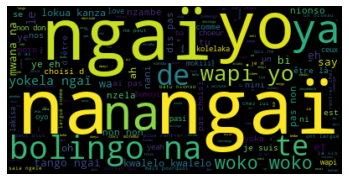

In [12]:
text = " ".join(review for review in df.lyricss)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../Image/lokuak.png")

In [13]:
corpus = df["lyricss"].tolist()
corpus

[' lokua kanza  tango ngaï na lelaka moto andima ngaï te tango ngaï na belelaka yo wapi yo mayi ya miso ekotanga bolingo na ngaï akeyi eh nani akoyembela ngaï nzembo ya bolingo ye eh wapi yo   bis  ye eh ye wapi yo oh bolingo na ngaï okeyi wapi wapi yo oh wapi yo bolingo na ngaï soki lelo olobi yo oboya ngaï na kosuka wapi ye ngaï ya oh ngaï ye eh mama ah ah mayi ya miso ekotanga bolingo na ngaï akeyi eh nani akoyembela ngaï nzembo ya bolingo ye eh wapi yo   bis  ye eh wapi yo oh bolingo na ngaï bolingo na ngaï soki otiki ngaï nani akolinga ngaï ye     wapi okeyi wapi bolingo na ngaï  wapi yo  bis  choeur  bolingo na ngaï voix parlée  bolingo na ngaï soki otiki ngaï naniakolinga ngaï lokola yo nani soki yo te nani bolingo na ngaï choeurs  wapi yo soki otiki ngaï nani akolinga ngaï wapi yo  ad lib  ',
 'ba na siben don bouda mon ni mon bo la wa mawo pomdom bi da bobe bodlan jon masi emi yen demba mongo ka budu yenibolo ebotinde bemba wo woko woko woko woko woko woko lembe wa ba na siben

4. Convert text to numbers by applying the Bag Of Words method

In [14]:
from sklearn.feature_extraction.text import CountVectorizer 
import nltk

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)
corpus

[' lokua kanza  tango ngaï na lelaka moto andima ngaï te tango ngaï na belelaka yo wapi yo mayi ya miso ekotanga bolingo na ngaï akeyi eh nani akoyembela ngaï nzembo ya bolingo ye eh wapi yo   bis  ye eh ye wapi yo oh bolingo na ngaï okeyi wapi wapi yo oh wapi yo bolingo na ngaï soki lelo olobi yo oboya ngaï na kosuka wapi ye ngaï ya oh ngaï ye eh mama ah ah mayi ya miso ekotanga bolingo na ngaï akeyi eh nani akoyembela ngaï nzembo ya bolingo ye eh wapi yo   bis  ye eh wapi yo oh bolingo na ngaï bolingo na ngaï soki otiki ngaï nani akolinga ngaï ye     wapi okeyi wapi bolingo na ngaï  wapi yo  bis  choeur  bolingo na ngaï voix parlée  bolingo na ngaï soki otiki ngaï naniakolinga ngaï lokola yo nani soki yo te nani bolingo na ngaï choeurs  wapi yo soki otiki ngaï nani akolinga ngaï wapi yo  ad lib  ',
 'ba na siben don bouda mon ni mon bo la wa mawo pomdom bi da bobe bodlan jon masi emi yen demba mongo ka budu yenibolo ebotinde bemba wo woko woko woko woko woko woko lembe wa ba na siben

In [16]:
#Sparse Matrix

out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
out

<10x457 sparse matrix of type '<class 'numpy.int64'>'
	with 547 stored elements in Compressed Sparse Row format>

In [18]:
df = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df.head(3)

,abidjan,acceptent,accusé,acte,ad,agir,ah,ai,akela,akeyi,...,yo,yoka,yokela,yooni,zalaka,zambe,zolaka,égaux,état,être
0,0,0,0,0,1,0,2,0,0,2,...,14,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Tf-Idf (Normalization)

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tdf.round(4)

,abidjan,acceptent,accusé,acte,ad,agir,ah,ai,akela,akeyi,...,yo,yoka,yokela,yooni,zalaka,zambe,zolaka,égaux,état,être
0,0.0000,0.0000,0.0000,0.0000,0.0362,0.0000,0.0538,0.000,0.0000,0.0723,...,0.3348,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0662,0.0000,...,0.3062,0.0562,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0294,0.0294,0.0882,0.0882,0.0000,0.0294,0.0000,0.147,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0588,0.0294,0.0294,0.1765
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1174,0.000,0.0000,0.0000,...,0.1827,0.1342,0.3947,0.0000,0.0395,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.2033,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.2831,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0552,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0742,0.0000,0.0000,0.0000,0.0000


In [20]:
tdf.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

5. Build and train a Naive Bayes classifier